# Library importation and request status getting
First we are importing all the needed libraries and then we are asking to the website weahterandclimate.com if it allows us scraping datas


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://weatherandclimate.com"
request = requests.get(url)
print(request.status_code)

200


# Creating a function to clean the scrapped data
Now we are creating a function in order to remove all the unecessary  characters in the collected data, especially elements like "°C" or blank space.

In [2]:
def place(array,index,separator):
    storage = []
    for i in range(len(array)):
            storage.append((array[i].split(separator))[index])

    return storage

The request status code is 200, so the website allows our request so we can scrap data in it.

# Creating a scraping function to collect the summary data
Our goal is now to create a function to scrap a table of the summary data in a specific year and specific mounth for a selected province in Madagascar.
Then after scraping it stores the collected data into an excel file so you can analyze it .

In [7]:
def summary_scrap(town,month,year):
    request = requests.get(url + "/{}/{}-{}".format(town,month,year))
    soup = BeautifulSoup(request.text,"lxml")
    table = soup.find("table",{"class","tb8"}).find_all("td") 
    data = []
    for i in range(len(table)):
        if table[i].text != "":
            data.append(table[i].text)
    
    tx = place(data[1:4],0,"°C")
    t= place(data[5:8],0,"°C")
    tm = place(data[9:12],0,"°C")
    td = place(data[13:16],0,"°C")
    RR = place(data[17:20],0,"|")
    ff = place(data[27:30],1,"|")
    rf = place(data[31:34],0,"kmh")
    mslp = place(data[35:],0,"mb")
 

    df = pd.DataFrame({"max_temperature [°C]":tx,"avg_temperature [°C]":t,"min_temperature [°C]":tm,"dew_point [°C]":td,"RR [mm]":RR,"FF [kmh]":ff,"gust_wind[kmh]":rf,"mslp[mb]":mslp})
    try:
        df.to_excel("summary:{}_{}_{}.xlsx".format(town,month,year),sheet_name="sheet1",index = False)
    except:
        pass
    
    return df

#example of scrapping summary data for Toamasina in January 2020
summary_scrap("toamasina","january","2020")

,max_temperature [°C],avg_temperature [°C],min_temperature [°C],dew_point [°C],RR [mm],FF [kmh],gust_wind[kmh],mslp[mb]
0,31.0,28.0,26.0,24.0,111.2mm,12.43mph,30.0,111.2
1,28.0,26.58,24.29,22.13,16.94mm,7.49mph,17.65,16.94
2,24.0,24.0,23.0,20.0,0.0mm,3.73mph,10.0,0.0


# Creating a scraping function to collect a daily data in a specific month at a specific year for a specific province
Now after realizing a function that collects a summary data,we are going to scrap a daily data . After collected and cleaned the data can be analyzed.

In [8]:
def daily_scrap(town,month,year):
    request = requests.get(url + "/{}/{}-{}".format(town,month,year))
    soup = BeautifulSoup(request.text,"lxml")
    table = soup.find("table",{"class","tb7"}).find_all("tr") 
    data = []
    for i in range(2,len(table)):
        if table[i].text != "":
            data.append(table[i].text.split("|"))
    data = np.array(data)  
    date = place(data[:,0],1,"\n")
    temperature = place(data[:,0],2,"\n")
    td = place(data[:,1],1,"\n")
    U = place(data[:,2],1,"\n")
    ff = place(data[:,2],2,"\n")
    P = place(data[:,4],0,"\n")
    RR = place(data[:,5],0,"\n")
    df = pd.DataFrame({"date":date,"temperature[°C]":temperature,"td[°C]":td,"Humidity[%]":U,"wind_speed[m/s]":ff,"Pressure[hPa]":P,"RR[mm]":RR})
    try:
        df.to_excel("daily:{}_{}_{}.xlsx".format(town,month,year),sheet_name="sheet1",index = False)
    except:
        pass
    
    return df

#example of scraping daily data for Antananarivo in December 2015
daily_scrap("antananarivo","december","2015")

,date,temperature[°C],td[°C],Humidity[%],wind_speed[m/s],Pressure[hPa],RR[mm]
0,2015-12-01,22,16,76,9,1016,0.44
1,2015-12-02,22,15,76,13,1017,0.14
2,2015-12-03,24,14,64,11,1016,0.01
3,2015-12-04,24,14,55,13,1015,0.0
4,2015-12-05,22,16,77,7,1015,0.41
5,2015-12-06,23,15,70,9,1014,0.1
6,2015-12-07,24,14,61,8,1013,0.0
7,2015-12-08,23,16,73,10,1013,0.2
8,2015-12-09,23,17,77,10,1015,0.51
9,2015-12-10,23,17,77,8,1015,0.87


# Example of an Exploratory Data Analysis for Antananarivo for December and July 2010
Now let's make a little EDA test.We will gather data for Antananarivo for 2 specific months first and then making a comparison. The parameter we will be selecting is the temperature here.

December mean temperautre :21.258064516129032°C
July mean temperature : 13.612903225806452°C


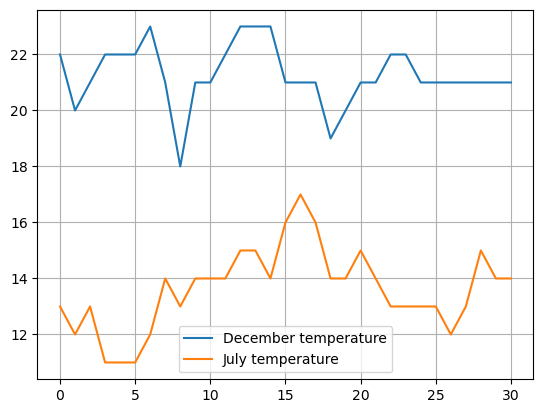

In [31]:
december = daily_scrap("antananarivo","december","2010")
july = daily_scrap("antananarivo","july","2010")
t1 = december["temperature[°C]"].astype("int64")
t2 = july["temperature[°C]"].astype("int64")
plt.grid()
plt.plot(np.arange(len(t1)),t1,label = "December temperature")
plt.plot(np.arange(len(t2)),t2,label = "July temperature")
plt.legend(loc = "lower center")
print(f"December mean temperautre :{np.mean(t1)}°C")
print(f"July mean temperature : {np.mean(t2)}°C")

As you can see the temperature of December is higher than on July, it relates exactly the difference between  Summer and Winter for Madagascar.